In [1]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier

# 모델 성능 평가: Precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

# Check the Frequency of Variable
from collections import Counter

# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
#분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
# Set the font to AppleGothic to display Korean characters on macOS
plt.rcParams['font.family'] = 'NanumGothic Eco'  # Mac's default Korean font

plt.rcParams["axes.unicode_minus"] = False  
pd.options.display.max_rows = 20

In [27]:
member_data=pd.read_csv("/home/piai/RFM_member.csv",encoding='euc-kr')
member_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11540 entries, 0 to 11539
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   회원번호         11540 non-null  int64  
 1   조합원상태        11540 non-null  object 
 2   성별           11540 non-null  object 
 3   연령           11540 non-null  int64  
 4   배송서비스신청여부    11540 non-null  object 
 5   모바일알람여부      11540 non-null  object 
 6   Gold_member  11540 non-null  object 
 7   주소대분류        11540 non-null  object 
 8   주소소분류        11540 non-null  object 
 9   프로모션여부       11540 non-null  int64  
 10  연령대          11540 non-null  object 
 11  R            11540 non-null  float64
 12  F            11540 non-null  float64
 13  M            11540 non-null  float64
 14  R_score      11540 non-null  int64  
 15  M_score      11540 non-null  int64  
 16  F_score      11540 non-null  int64  
 17  RFM_score    11540 non-null  float64
 18  RFM_rank     11540 non-null  object 
 19  주매장 

In [28]:
# '이탈여부' 컬럼을 정상은 0, 나머지는 1로 변환
member_data['이탈여부'] = member_data['이탈여부'].apply(lambda x: 0 if x == '정상' else 1)


In [29]:
member_data= member_data[[
    "성별", "연령", "배송서비스신청여부", "모바일알람여부", "프로모션여부", 
    "RFM_score", "RFM_rank", "주매장", "재구매여부", "5개월이내재구매","이탈여부"
]]

In [30]:
member_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11540 entries, 0 to 11539
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   성별         11540 non-null  object 
 1   연령         11540 non-null  int64  
 2   배송서비스신청여부  11540 non-null  object 
 3   모바일알람여부    11540 non-null  object 
 4   프로모션여부     11540 non-null  int64  
 5   RFM_score  11540 non-null  float64
 6   RFM_rank   11540 non-null  object 
 7   주매장        11540 non-null  object 
 8   재구매여부      11540 non-null  int64  
 9   5개월이내재구매   11540 non-null  int64  
 10  이탈여부       11540 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 991.8+ KB


In [31]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(member_data)
df_raw_dummy.head()

,연령,프로모션여부,RFM_score,재구매여부,5개월이내재구매,이탈여부,성별_남,성별_여,배송서비스신청여부_미신청,배송서비스신청여부_신청,...,모바일알람여부_수신,RFM_rank_포미방문자,RFM_rank_포미초대손님,RFM_rank_포미킹,RFM_rank_포미패밀리,RFM_rank_포미프렌즈,주매장_매장A,주매장_매장B,주매장_매장C,주매장_매장D
0,43,0,1.0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
1,46,0,1.9,0,0,0,0,1,1,0,...,1,1,0,0,0,0,0,1,0,0
2,40,0,1.0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,48,0,1.6,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
4,38,0,1.0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0


In [32]:
# 데이터 분리:설명변수, 목표변수 구분
df_raw_x = df_raw_dummy.drop(["이탈여부"], axis = 1, inplace = False)
df_raw_y = df_raw_dummy["이탈여부"] 

# 데이터 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (11540, 20)
분할 후 설명변수 데이터 :Train (8078, 20)   Test (3462, 20)


In [33]:
display(member_data.head(10))
display(df_raw_x.head(10))

,성별,연령,배송서비스신청여부,모바일알람여부,프로모션여부,RFM_score,RFM_rank,주매장,재구매여부,5개월이내재구매,이탈여부
0,여,43,미신청,미수신,0,1.0,포미방문자,매장C,0,0,1
1,여,46,미신청,수신,0,1.9,포미방문자,매장B,0,0,0
2,남,40,미신청,미수신,0,1.0,포미방문자,매장B,0,0,1
3,여,48,미신청,미수신,0,1.6,포미방문자,매장D,0,0,0
4,여,38,미신청,미수신,0,1.0,포미방문자,매장C,0,0,1
5,여,45,미신청,미수신,0,1.3,포미방문자,매장D,0,0,1
6,여,46,미신청,미수신,0,2.2,포미초대손님,매장C,0,0,0
7,여,56,미신청,미수신,0,1.9,포미방문자,매장A,0,0,0
8,남,58,미신청,미수신,0,1.0,포미방문자,매장C,0,0,1
9,여,32,미신청,미수신,0,1.9,포미방문자,매장C,0,0,0


,연령,프로모션여부,RFM_score,재구매여부,5개월이내재구매,성별_남,성별_여,배송서비스신청여부_미신청,배송서비스신청여부_신청,모바일알람여부_미수신,모바일알람여부_수신,RFM_rank_포미방문자,RFM_rank_포미초대손님,RFM_rank_포미킹,RFM_rank_포미패밀리,RFM_rank_포미프렌즈,주매장_매장A,주매장_매장B,주매장_매장C,주매장_매장D
0,43,0,1.0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0
1,46,0,1.9,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
2,40,0,1.0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0
3,48,0,1.6,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1
4,38,0,1.0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0
5,45,0,1.3,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1
6,46,0,2.2,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
7,56,0,1.9,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0
8,58,0,1.0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0
9,32,0,1.9,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0


In [34]:
# Data 구조 확인
print("Data 구조:", df_raw_x.columns)
print()
print("변수 : ", df_train_x.columns)

Data 구조: Index(['연령', '프로모션여부', 'RFM_score', '재구매여부', '5개월이내재구매', '성별_남', '성별_여',
       '배송서비스신청여부_미신청', '배송서비스신청여부_신청', '모바일알람여부_미수신', '모바일알람여부_수신',
       'RFM_rank_포미방문자', 'RFM_rank_포미초대손님', 'RFM_rank_포미킹', 'RFM_rank_포미패밀리',
       'RFM_rank_포미프렌즈', '주매장_매장A', '주매장_매장B', '주매장_매장C', '주매장_매장D'],
      dtype='object')

변수 :  Index(['연령', '프로모션여부', 'RFM_score', '재구매여부', '5개월이내재구매', '성별_남', '성별_여',
       '배송서비스신청여부_미신청', '배송서비스신청여부_신청', '모바일알람여부_미수신', '모바일알람여부_수신',
       'RFM_rank_포미방문자', 'RFM_rank_포미초대손님', 'RFM_rank_포미킹', 'RFM_rank_포미패밀리',
       'RFM_rank_포미프렌즈', '주매장_매장A', '주매장_매장B', '주매장_매장C', '주매장_매장D'],
      dtype='object')


In [35]:
'''from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 범위 설정 (촘촘하게 설정)
para_lr = [0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]  # learning_rate 후보 값
para_depth = [3, 4, 5, 6, 7, 8, 9, 10]                   # max_depth 후보 값
para_leaf = [1, 2, 3, 4, 5, 6, 7, 8]                     # min_samples_leaf 후보 값
para_estimators = [50, 100, 150, 200]                    # n_estimators 후보 값

# 모델 설정
estimator = GradientBoostingClassifier(random_state=1234)

# 하이퍼파라미터 그리드 설정
param_grid = {
    "learning_rate": para_lr,
    "max_depth": para_depth,
    "min_samples_leaf": para_leaf,
    "n_estimators": para_estimators
}

# GridSearchCV로 최적 하이퍼파라미터 탐색
grid_gb = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_gb.fit(df_train_x, df_train_y)

# 최적의 모델과 하이퍼파라미터 및 성능 출력
print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))'''


'from sklearn.ensemble import GradientBoostingClassifier\nfrom sklearn.model_selection import GridSearchCV\n\n# 하이퍼파라미터 범위 설정 (촘촘하게 설정)\npara_lr = [0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]  # learning_rate 후보 값\npara_depth = [3, 4, 5, 6, 7, 8, 9, 10]                   # max_depth 후보 값\npara_leaf = [1, 2, 3, 4, 5, 6, 7, 8]                     # min_samples_leaf 후보 값\npara_estimators = [50, 100, 150, 200]                    # n_estimators 후보 값\n\n# 모델 설정\nestimator = GradientBoostingClassifier(random_state=1234)\n\n# 하이퍼파라미터 그리드 설정\nparam_grid = {\n    "learning_rate": para_lr,\n    "max_depth": para_depth,\n    "min_samples_leaf": para_leaf,\n    "n_estimators": para_estimators\n}\n\n# GridSearchCV로 최적 하이퍼파라미터 탐색\ngrid_gb = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)\ngrid_gb.fit(df_train_x, df_train_y)\n\n# 최적의 모델과 하이퍼파라미터 및 성능 출력\nprint("best estimator model: \n{}".format(grid_gb.best_estimator_))\nprint("\nbest parameter: \n{}".format(grid_gb.best_params_))

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
pd.options.display.max_rows = None

# 최종 모델 설정
gb_final = GradientBoostingClassifier(min_samples_leaf=8, max_depth=5, n_estimators=50, learning_rate=0.1, 
                                      random_state=1234)
# 모델 학습
gb_final.fit(df_train_x, df_train_y)

# Train 데이터 예측
y_pred_train = gb_final.predict(df_train_x)
# Test 데이터 예측
y_pred_test = gb_final.predict(df_test_x)

# Train 모델 정확도
print("Train Accuracy: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# Test 모델 정확도
print("Test Accuracy: {:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))

# Train 데이터 Confusion Matrix와 F1 Score
print("Train Confusion Matrix: \n{}".format(confusion_matrix(df_train_y, y_pred_train)))
print("\nTrain Classification Report:")
print(classification_report(df_train_y, y_pred_train, digits=3))

# Test 데이터 Confusion Matrix와 F1 Score
print("\nTest Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred_test)))
print("\nTest Classification Report:")
print(classification_report(df_test_y, y_pred_test, digits=3))


Train Accuracy: 0.955
Test Accuracy: 0.947

Train Confusion Matrix: 
[[6237  162]
 [ 199 1480]]

Train Classification Report:
              precision    recall  f1-score   support

           0      0.969     0.975     0.972      6399
           1      0.901     0.881     0.891      1679

    accuracy                          0.955      8078
   macro avg      0.935     0.928     0.932      8078
weighted avg      0.955     0.955     0.955      8078


Test Confusion Matrix: 
[[2701   66]
 [ 117  578]]

Test Classification Report:
              precision    recall  f1-score   support

           0      0.958     0.976     0.967      2767
           1      0.898     0.832     0.863       695

    accuracy                          0.947      3462
   macro avg      0.928     0.904     0.915      3462
weighted avg      0.946     0.947     0.946      3462



In [37]:
# xgboost 패키지 불러오기 
from xgboost import XGBClassifier
# 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# XGBoost 모델 설정
xgboost_model = XGBClassifier(n_estimators=50, max_depth=3, learning_rate=0.1, random_state=1234)

# 모델 학습
xgboost_model.fit(df_train_x, df_train_y)

# Train 데이터 평가
xgb_pred_train = xgboost_model.predict(df_train_x)
train_accuracy = accuracy_score(df_train_y, xgb_pred_train)
print("\nTrain Accuracy: {:.3f}".format(train_accuracy))
print("\n사용자 모델 평가 : Train")
print(classification_report(df_train_y, xgb_pred_train, digits=3))  # 소수점 3자리 출력

# Test 데이터 평가
xgb_pred_test = xgboost_model.predict(df_test_x)
test_accuracy = accuracy_score(df_test_y, xgb_pred_test)
print("\nTest Accuracy: {:.3f}".format(test_accuracy))
print("\n사용자 모델 평가 : Test")
print(classification_report(df_test_y, xgb_pred_test, digits=3))  # 소수점 3자리 출력



Train Accuracy: 0.948

사용자 모델 평가 : Train
              precision    recall  f1-score   support

           0      0.971     0.963     0.967      6399
           1      0.863     0.890     0.876      1679

    accuracy                          0.948      8078
   macro avg      0.917     0.926     0.922      8078
weighted avg      0.948     0.948     0.948      8078


Test Accuracy: 0.947

사용자 모델 평가 : Test
              precision    recall  f1-score   support

           0      0.966     0.969     0.967      2767
           1      0.873     0.863     0.868       695

    accuracy                          0.947      3462
   macro avg      0.920     0.916     0.918      3462
weighted avg      0.947     0.947     0.947      3462



In [39]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
#분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
member_data=pd.read_csv("/home/piai/RFM_member.csv",encoding='euc-kr')
# '이탈여부' 컬럼을 정상은 0, 나머지는 1로 변환
member_data['이탈여부'] = member_data['이탈여부'].apply(lambda x: 0 if x == '정상' else 1)


In [41]:
member_data= member_data[[
    "성별", "연령", "배송서비스신청여부", "모바일알람여부", "프로모션여부", 
    "RFM_score", "RFM_rank", "주매장", "재구매여부", "5개월이내재구매","이탈여부"
]]

In [42]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(member_data)
df_raw_dummy.head()

,연령,프로모션여부,RFM_score,재구매여부,5개월이내재구매,이탈여부,성별_남,성별_여,배송서비스신청여부_미신청,배송서비스신청여부_신청,...,모바일알람여부_수신,RFM_rank_포미방문자,RFM_rank_포미초대손님,RFM_rank_포미킹,RFM_rank_포미패밀리,RFM_rank_포미프렌즈,주매장_매장A,주매장_매장B,주매장_매장C,주매장_매장D
0,43,0,1.0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
1,46,0,1.9,0,0,0,0,1,1,0,...,1,1,0,0,0,0,0,1,0,0
2,40,0,1.0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,48,0,1.6,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
4,38,0,1.0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0


In [43]:
# 데이터 분리:설명변수, 목표변수 구분
df_raw_x = df_raw_dummy.drop(["이탈여부"], axis = 1, inplace = False)
df_raw_y = df_raw_dummy["이탈여부"] 

# 데이터 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (11540, 20)
분할 후 설명변수 데이터 :Train (8078, 20)   Test (3462, 20)


In [44]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 범위 설정 (촘촘하게 설정)
para_depth = [3, 5, 7, 9, 12, 15, 20]         # max_depth 후보 값
para_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 10]      # min_samples_leaf 후보 값

# 모델 설정
estimator = RandomForestClassifier(n_estimators=100, random_state=1234)

# 하이퍼파라미터 그리드 설정
param_grid = {
    "max_depth": para_depth,
    "min_samples_leaf": para_leaf
}

# GridSearchCV로 최적 하이퍼파라미터 탐색
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)

# 최적의 모델과 하이퍼파라미터 및 성능 출력
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))'''


'from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV\n\n# 하이퍼파라미터 범위 설정 (촘촘하게 설정)\npara_depth = [3, 5, 7, 9, 12, 15, 20]         # max_depth 후보 값\npara_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 10]      # min_samples_leaf 후보 값\n\n# 모델 설정\nestimator = RandomForestClassifier(n_estimators=100, random_state=1234)\n\n# 하이퍼파라미터 그리드 설정\nparam_grid = {\n    "max_depth": para_depth,\n    "min_samples_leaf": para_leaf\n}\n\n# GridSearchCV로 최적 하이퍼파라미터 탐색\ngrid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)\ngrid_rf.fit(df_train_x, df_train_y)\n\n# 최적의 모델과 하이퍼파라미터 및 성능 출력\nprint("best estimator model: \n{}".format(grid_rf.best_estimator_))\nprint("\nbest parameter: \n{}".format(grid_rf.best_params_))\nprint("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))'

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 최종 모델 설정
rf_final = RandomForestClassifier(min_samples_leaf=10, max_depth=12, n_estimators=100, random_state=1234)

# 모델 학습
rf_final.fit(df_train_x, df_train_y)

# Train 데이터 예측
y_pred_train = rf_final.predict(df_train_x)

# Test 데이터 예측
y_pred_test = rf_final.predict(df_test_x)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))

# Test 데이터 정확도
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))

# Train 데이터 Confusion Matrix와 F1 Score
print("Train Confusion Matrix: \n{}".format(confusion_matrix(df_train_y, y_pred_train)))
print("\nTrain Classification Report:")
print(classification_report(df_train_y, y_pred_train, digits=3))

# Test 데이터 Confusion Matrix와 F1 Score
print("\nTest Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred_test)))
print("\nTest Classification Report:")
print(classification_report(df_test_y, y_pred_test, digits=3))


Accuracy on training set: 0.948
Accuracy on test set: 0.949

Train Confusion Matrix: 
[[6173  226]
 [ 192 1487]]

Train Classification Report:
              precision    recall  f1-score   support

           0      0.970     0.965     0.967      6399
           1      0.868     0.886     0.877      1679

    accuracy                          0.948      8078
   macro avg      0.919     0.925     0.922      8078
weighted avg      0.949     0.948     0.948      8078


Test Confusion Matrix: 
[[2683   84]
 [  94  601]]

Test Classification Report:
              precision    recall  f1-score   support

           0      0.966     0.970     0.968      2767
           1      0.877     0.865     0.871       695

    accuracy                          0.949      3462
   macro avg      0.922     0.917     0.919      3462
weighted avg      0.948     0.949     0.948      3462



Feature Importances:
             Feature  Importance
2         RFM_score    0.499160
11   RFM_rank_포미방문자    0.190888
4          5개월이내재구매    0.142231
3             재구매여부    0.065898
12  RFM_rank_포미초대손님    0.050271
15   RFM_rank_포미프렌즈    0.018420
0                연령    0.011227
14   RFM_rank_포미패밀리    0.005059
7     배송서비스신청여부_미신청    0.004136
9       모바일알람여부_미수신    0.003268
10       모바일알람여부_수신    0.002744
13     RFM_rank_포미킹    0.001539
8      배송서비스신청여부_신청    0.000984
17          주매장_매장B    0.000872
18          주매장_매장C    0.000848
16          주매장_매장A    0.000750
19          주매장_매장D    0.000747
1            프로모션여부    0.000403
5              성별_남    0.000324
6              성별_여    0.000231


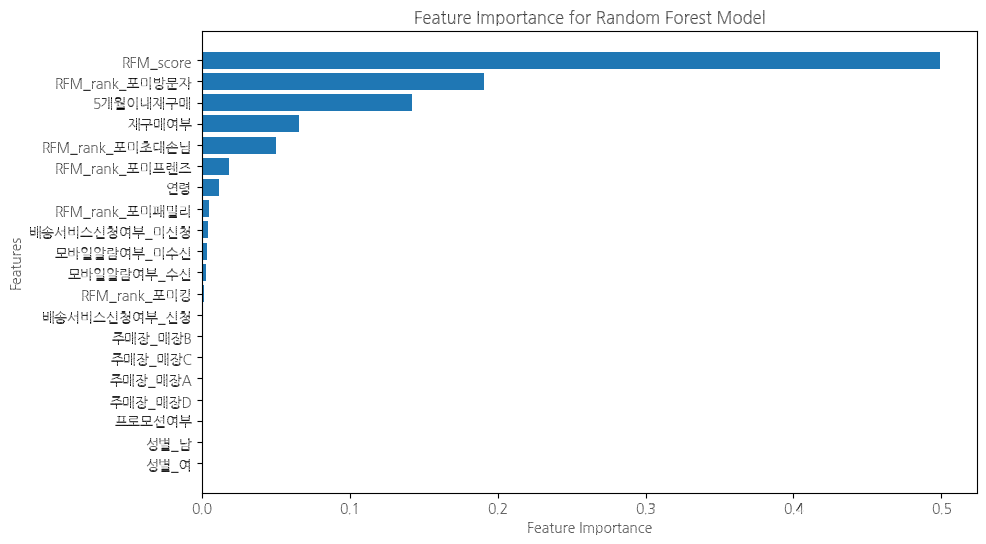

In [46]:
import pandas as pd
import numpy as np

# Feature Importance
feature_importances = rf_final.feature_importances_
features = df_train_x.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print("Feature Importances:\n", feature_importance_df)

# Plotting feature importance for better visualization (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Random Forest Model")
plt.show()
